In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [9]:
data = pd.read_csv('data.csv',parse_dates=['date'])
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               577 non-null    int64         
 1   season           577 non-null    int64         
 2   city             570 non-null    object        
 3   date             577 non-null    datetime64[ns]
 4   team1            577 non-null    object        
 5   team2            577 non-null    object        
 6   toss_winner      577 non-null    object        
 7   toss_decision    577 non-null    object        
 8   result           577 non-null    object        
 9   dl_applied       577 non-null    int64         
 10  winner           574 non-null    object        
 11  win_by_runs      577 non-null    int64         
 12  win_by_wickets   577 non-null    int64         
 13  player_of_match  574 non-null    object        
 14  venue            577 non-null    object   

In [11]:
data.drop(['umpire3'],axis=1,inplace=True)

In [12]:
data.set_index('id',inplace=True)

In [13]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [15]:
data[data['city'].isna()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
403,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
404,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
408,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
410,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
411,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
416,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
418,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [16]:
data['team1'].value_counts()

Chennai Super Kings            77
Mumbai Indians                 76
Kings XI Punjab                69
Kolkata Knight Riders          62
Royal Challengers Bangalore    62
Delhi Daredevils               57
Rajasthan Royals               54
Deccan Chargers                43
Sunrisers Hyderabad            37
Pune Warriors                  20
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Gujarat Lions                   6
Name: team1, dtype: int64

In [24]:
data.groupby(['city','team1','team2'])['win_by_runs','win_by_wickets'].count()[:20]

C:\Users\Mohamed\AppData\Local\Temp/ipykernel_8492/2879075170.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['city','team1','team2'])['win_by_runs','win_by_wickets'].count()[:20]


win_by_runs  \
city      team1                       team2                                      
Abu Dhabi Chennai Super Kings         Delhi Daredevils                       1   
                                      Kings XI Punjab                        1   
          Kings XI Punjab             Kolkata Knight Riders                  1   
          Kolkata Knight Riders       Mumbai Indians                         1   
          Rajasthan Royals            Kolkata Knight Riders                  1   
          Royal Challengers Bangalore Rajasthan Royals                       1   
          Sunrisers Hyderabad         Rajasthan Royals                       1   
Ahmedabad Chennai Super Kings         Rajasthan Royals                       1   
          Deccan Chargers             Rajasthan Royals                       1   
          Mumbai Indians              Rajasthan Royals                       2   
          Rajasthan Royals            Chennai Super Kings                    1   
                                      Delhi Daredevils                       2   
                                      Kings XI Punjab                        1   
                                      Kolkata Knight Riders                  2   
                                      Royal Challengers Bangalore            1   
          Sunrisers Hyderabad         Rajasthan Royals                       1   
Bangalore Chennai Super Kings         Mumbai Indians                         1   
                                      Royal Challengers Bangalore            3   
          Deccan Chargers             Royal Challengers Bangalore            1   
          Delhi Daredevils            Royal Challengers Bangalore            3   

                                                                   win_by_wickets  
city      team1                       team2                                        
Abu Dhabi Chennai Super Kings         Delhi Daredevils                          1  
                                      Kings XI Punjab                           1  
          Kings XI Punjab             Kolkata Knight Riders                     1  
          Kolkata Knight Riders       Mumbai Indians                            1  
          Rajasthan Royals            Kolkata Knight Riders                     1  
          Royal Challengers Bangalore Rajasthan Royals                          1  
          Sunrisers Hyderabad         Rajasthan Royals                          1  
Ahmedabad Chennai Super Kings         Rajasthan Royals                          1  
          Deccan Chargers             Rajasthan Royals                          1  
          Mumbai Indians              Rajasthan Royals                          2  
          Rajasthan Royals            Chennai Super Kings                       1  
                                      Delhi Daredevils                          2  
                                      Kings XI Punjab                           1  
                                      Kolkata Knight Riders                     2  
                                      Royal Challengers Bangalore               1  
          Sunrisers Hyderabad         Rajasthan Royals                          1  
Bangalore Chennai Super Kings         Mumbai Indians                            1  
                                      Royal Challengers Bangalore               3  
          Deccan Chargers             Royal Challengers Bangalore               1  
          Delhi Daredevils            Royal Challengers Bangalore               3

<AxesSubplot:xlabel='count', ylabel='winner'>

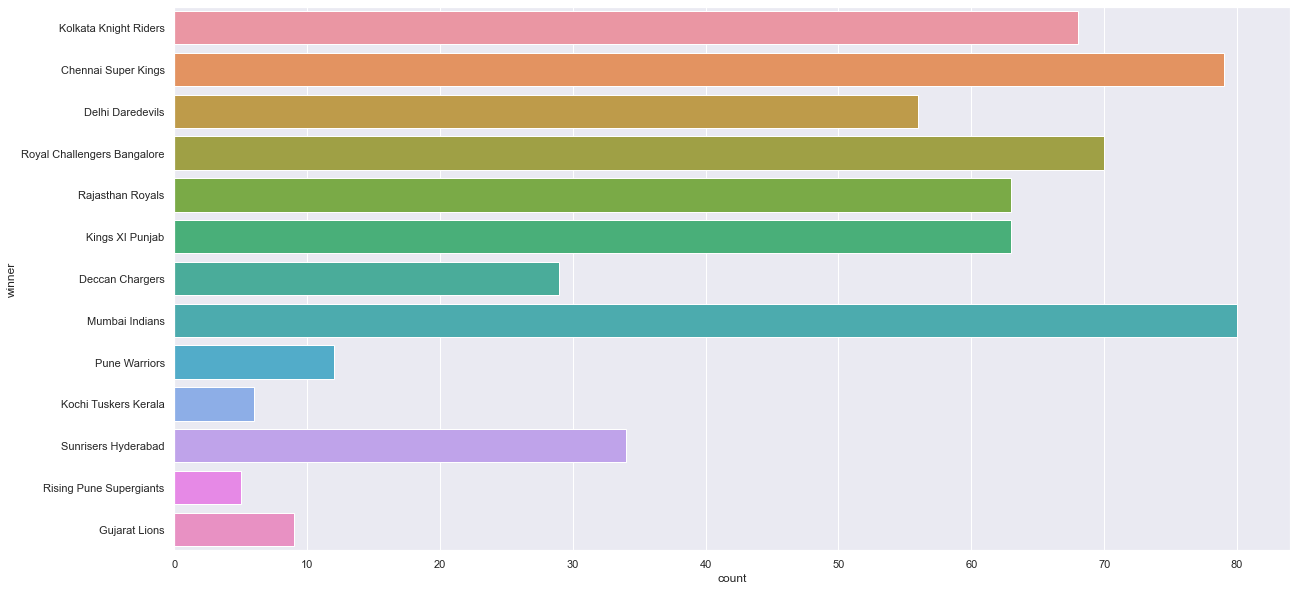

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,y='winner')

In [31]:
data.groupby(['season','team1','team2']).mean()

dl_applied  \
season team1               team2                                     
2008   Chennai Super Kings Deccan Chargers                     0.0   
                           Delhi Daredevils                    0.0   
                           Kings XI Punjab                     0.0   
                           Mumbai Indians                      0.0   
                           Rajasthan Royals                    0.0   
...                                                            ...   
2016   Sunrisers Hyderabad Delhi Daredevils                    0.0   
                           Kolkata Knight Riders               0.0   
                           Mumbai Indians                      0.0   
                           Rising Pune Supergiants             0.5   
                           Royal Challengers Bangalore         0.0   

                                                        win_by_runs  \
season team1               team2                                      
2008   Chennai Super Kings Deccan Chargers                      0.0   
                           Delhi Daredevils                     0.0   
                           Kings XI Punjab                     25.5   
                           Mumbai Indians                       3.0   
                           Rajasthan Royals                     0.0   
...                                                             ...   
2016   Sunrisers Hyderabad Delhi Daredevils                     0.0   
                           Kolkata Knight Riders               11.0   
                           Mumbai Indians                      85.0   
                           Rising Pune Supergiants             19.0   
                           Royal Challengers Bangalore         11.5   

                                                        win_by_wickets  
season team1               team2                                        
2008   Chennai Super Kings Deccan Chargers                         7.0  
                           Delhi Daredevils                        8.0  
                           Kings XI Punjab                         0.0  
                           Mumbai Indians                          4.5  
                           Rajasthan Royals                        5.5  
...                                                                ...  
2016   Sunrisers Hyderabad Delhi Daredevils                        6.5  
                           Kolkata Knight Riders                   4.0  
                           Mumbai Indians                          0.0  
                           Rising Pune Supergiants                 0.0  
                           Royal Challengers Bangalore             0.0  

[415 rows x 3 columns]

In [34]:
data.groupby(['season','winner'])[['win_by_runs','win_by_wickets']].sum()

win_by_runs  win_by_wickets
season winner                                                  
2008   Chennai Super Kings                   73              29
       Deccan Chargers                        0              17
       Delhi Daredevils                      22              36
       Kings XI Punjab                      123              32
       Kolkata Knight Riders                191               8
...                                         ...             ...
2016   Kolkata Knight Riders                 29              38
       Mumbai Indians                       105              32
       Rising Pune Supergiants               53              20
       Royal Challengers Bangalore          285              26
       Sunrisers Hyderabad                  134              38

[76 rows x 2 columns]

<AxesSubplot:>

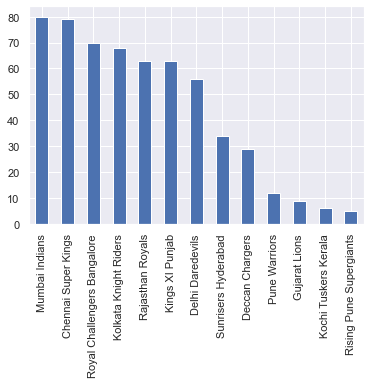

In [33]:
data['winner'].value_counts().plot(kind="bar")

In [36]:
data.groupby(['season','player_of_match'])['winner'].value_counts()

season  player_of_match  winner                     
2008    A Kumble         Royal Challengers Bangalore    1
        A Mishra         Delhi Daredevils               1
        A Nehra          Mumbai Indians                 1
        AC Gilchrist     Deccan Chargers                2
        BB McCullum      Kolkata Knight Riders          1
                                                       ..
2016    SR Watson        Royal Challengers Bangalore    1
        SV Samson        Delhi Daredevils               1
        V Kohli          Royal Challengers Bangalore    4
                         Gujarat Lions                  1
        YK Pathan        Kolkata Knight Riders          2
Name: winner, Length: 395, dtype: int64

In [38]:
data['player_of_match'].value_counts()

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
                  ..
MN Samuels         1
S Badrinath        1
R Bhatia           1
RE Levi            1
BCJ Cutting        1
Name: player_of_match, Length: 187, dtype: int64

<PolarAxesSubplot:xlabel='city', ylabel='count'>

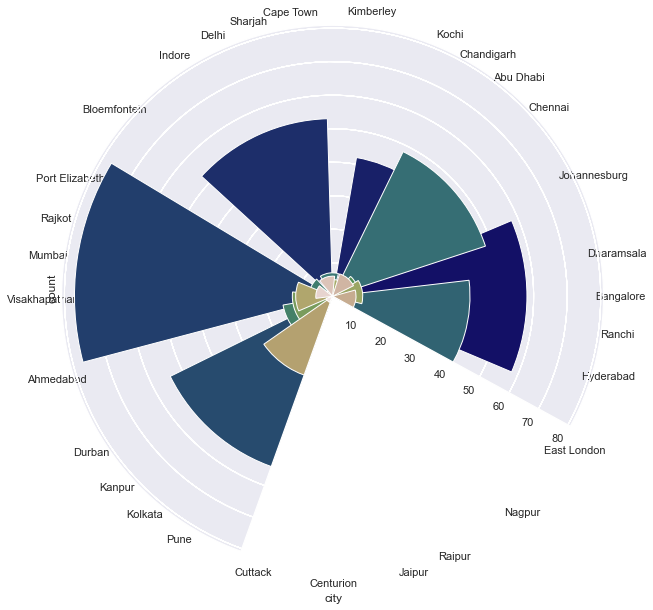

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(polar=True)
sns.countplot(x='city',data=data,palette='gist_earth')